**Visualizing protein interaction networks in Python**

Python'da protein etkileşim ağlarını görselleştirme

Protein etkileşim verileri son derece önemlidir. Genler tarafından kodlanan biyomoleküller arasındaki etkileşimi tanımlar. Hücresel işlevin karmaşıklığını anlamamızı sağlar. Protein etkileşim verilerini içeren birçok veri tabanı vardır, ancak STRING en iyilerinden biridir. Bu çalışmada, STRING API'sinden protein etkileşim verilerini nasıl indireceğinizi ve NetworkX kullanarak bu verilerin grafiklerini ve görselleştirmelerini nasıl oluşturacağınızı göstereceğim.

In [1]:
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Verilerin Toplanması ve Hazırlanması

Veri setimiz, serotonin yolaklarında yer alan bir avuç protein için çift yönlü etkileşimler içerecektir. Bu etkileşimlerin STRING'de bulunabileceği birkaç yol vardır. STRING web sitesine bir protein listesi ile gidebilir ve çoklu protein aramasını kullanabiliriz, ancak burada her şeyi Python kullanarak yapmak istiyoruz. requests kütüphanesi, verileri toplamak için HTTP isteklerini kolayca kullanmamızı sağlar. STRING belgeleri REST API kullanımı hakkında ayrıntılı bilgi verir ve birçok örnek içerir, ancak birden fazla protein için ağ bilgisi toplamak için temel adres şu şekildedir:

https://string-db.org/api/[output-format]/network?identifiers=[your_identifiers]&[optional_parameters]

In [2]:
protein_list = ['TPH1','COMT','SLC18A2','HTR1B','HTR2C','HTR2A','MAOA',
            'TPH2','HTR1A','HTR7','SLC6A4','GABBR2','POMC','GNAI3',
            'NPY','ADCY1','PDYN','GRM2','GRM3','GABBR1']

# protein_list = ['MDFIC', 'CTCF', 'CHIA', 'CCNT1', 'RAD21', 'FBL', 'THBS1', 'TMEM16', 'ZIC2', 'PIAS1']

proteins = '%0d'.join(protein_list)
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)

In [3]:
lines = r.text.split('\n') # metni yanıt nesnesinden çeker ve yeni satırlara göre böler
data = [l.split('\t') for l in lines] # her satırı sekmelere göre bileşenlerine ayırın
# ilk satırı sütun adları olarak kullanarak veri çerçevesine dönüştürün; boş, son satırı bırakın
df = pd.DataFrame(data[1:-1], columns = data[0])
# iki proteinin tercih edilen adlarını ve etkileşimin puanını içeren veri çerçevesi
interactions = df[['preferredName_A', 'preferredName_B', 'score']]

In [4]:
df

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,9606.ENSP00000250018,9606.ENSP00000378492,TPH1,GRM2,9606,0.436,0,0,0,0,0,0,0.436
1,9606.ENSP00000250018,9606.ENSP00000337949,TPH1,HTR7,9606,0.607,0,0,0,0.049,0,0,0.604
2,9606.ENSP00000250018,9606.ENSP00000354511,TPH1,COMT,9606,0.636,0,0,0,0,0,0,0.636
3,9606.ENSP00000250018,9606.ENSP00000496339,TPH1,SLC18A2,9606,0.653,0,0,0,0.049,0.087,0,0.633
4,9606.ENSP00000250018,9606.ENSP00000316244,TPH1,HTR1A,9606,0.689,0,0,0,0.049,0,0,0.687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9606.ENSP00000384092,9606.ENSP00000440185,POMC,PDYN,9606,0.994,0,0,0,0,0,0.9,0.948
97,9606.ENSP00000384364,9606.ENSP00000496339,NPY,SLC18A2,9606,0.449,0,0,0,0,0,0,0.449
98,9606.ENSP00000384364,9606.ENSP00000437737,NPY,HTR2A,9606,0.491,0,0,0,0.073,0,0,0.474
99,9606.ENSP00000384364,9606.ENSP00000440185,NPY,PDYN,9606,0.932,0,0,0,0.097,0,0.5,0.862


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   stringId_A       101 non-null    object
 1   stringId_B       101 non-null    object
 2   preferredName_A  101 non-null    object
 3   preferredName_B  101 non-null    object
 4   ncbiTaxonId      101 non-null    object
 5   score            101 non-null    object
 6   nscore           101 non-null    object
 7   fscore           101 non-null    object
 8   pscore           101 non-null    object
 9   ascore           101 non-null    object
 10  escore           101 non-null    object
 11  dscore           101 non-null    object
 12  tscore           101 non-null    object
dtypes: object(13)
memory usage: 10.4+ KB


In [6]:
interactions

,preferredName_A,preferredName_B,score
0,TPH1,GRM2,0.436
1,TPH1,HTR7,0.607
2,TPH1,COMT,0.636
3,TPH1,SLC18A2,0.653
4,TPH1,HTR1A,0.689
...,...,...,...
96,POMC,PDYN,0.994
97,NPY,SLC18A2,0.449
98,NPY,HTR2A,0.491
99,NPY,PDYN,0.932


Network Oluşturma

NetworkX çeşitli grafik sınıfları içerir. Bu durumda, yönlendirilmemiş, ağırlıklı bir grafik oluşturacağız. A proteini ile B proteini arasındaki etkileşim, B proteini ile A proteini arasındaki etkileşimle aynı olduğu için grafik yönlendirilmemiş, kenarlar etkileşim puanına göre ağırlıklara sahip olacağı için grafik ağırlıklandırılmıştır.

Etkileşim veri çerçevesi, etkileşime giren iki proteini ve etkileşimin puanını içeren her etkileşim için bir satıra sahiptir. Aşağıdaki kod, bu verilerin NetworkX ile grafik oluşturmak için nasıl kullanılabileceğini göstermektedir. Her düğüm bir proteini, her kenar iki protein arasındaki bir etkileşimi temsil eder ve her kenar skora göre ağırlıklandırılır.

In [7]:
G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # yüksek puanların = düşük ağırlığın olduğu ağırlıklı kenar olarak puan
    G.add_weighted_edges_from([(a,b,w)]) # grafiğe ağırlıklı kenar ekleme

Grafik 101 kenar (etkileşim) ile 20 düğüm (protein) içermektedir. Bir düğümün derecesi, o düğüme bağlı kenarların sayısıdır. Bu grafikte ortalama derece 12,8'dir. Aşağıdaki kodu kullanarak bu grafiğin basit bir görselleştirmesini oluşturabiliriz. NetworkX'in düğüm konumlandırma algoritmalarından biri olan nx.spring_layout kullanımına dikkat edin.

In [8]:
print(G)
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Graph named 'Protein Interaction Graph' with 20 nodes and 101 edges
Number of nodes 20
Number of edges 101
Average degree 10.1


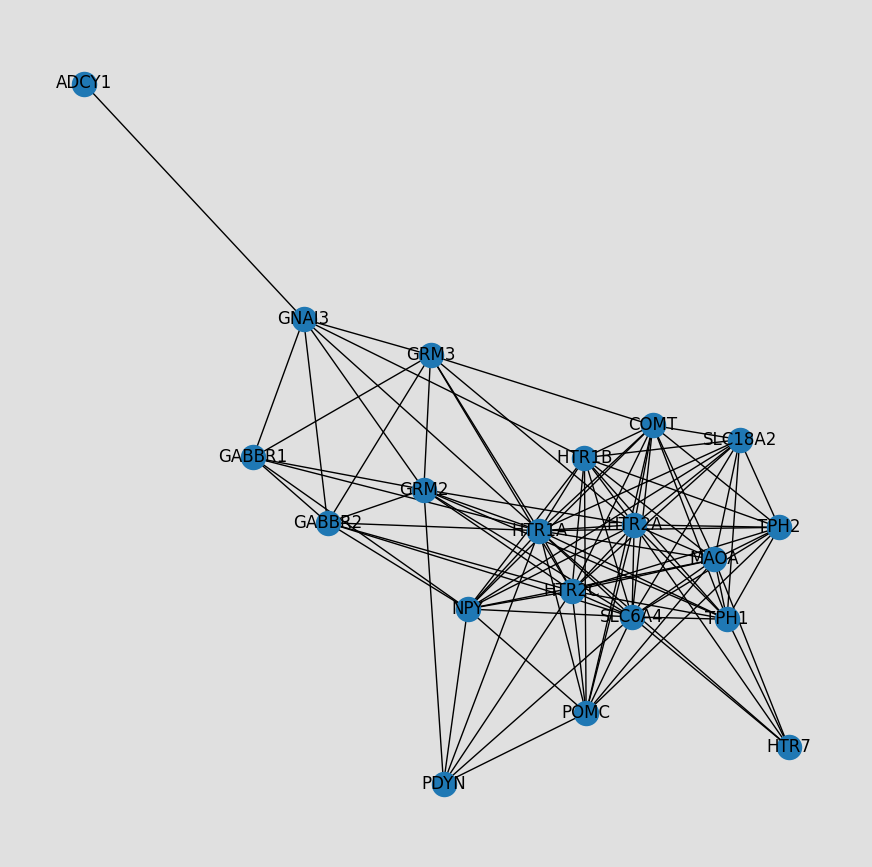

In [9]:
pos = nx.spring_layout(G) # yay düzenini kullanarak düğümleri konumlandırın
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

Yukarıda gösterilen basit görselleştirme, grafik hakkında daha fazla bilgi içerecek şekilde geliştirilebilir. Bir düğüme bağlı kenarların sayısı olan dereceden daha önce bahsetmiştim. Ekleyebileceğimiz bir başka ölçü de arasındalık merkeziliğidir. Grafikteki her bir düğüm çifti bir en kısa yolla birbirine bağlanır. Ağırlıksız bir grafikte en kısa yol, iki düğümü birbirine bağlayan en küçük kenar kümesinden oluşur. Burada olduğu gibi ağırlıklı bir grafikte en kısa yol, en küçük ağırlık toplamına sahip kenarlar kümesinden oluşur. Belirli bir düğümün arasındalık merkeziliği, tüm en kısa yollardan o düğümden geçen en kısa yolların sayısının ölçüsüdür. Aşağıdaki kod, renk ve boyutunu belirlemek için her düğümün derecesini ve arasındalık merkeziliğini kullanır ve kenarların renk ve boyutunu belirlemek için kenar ağırlıklarını kullanır.

In [10]:
# fdeğer listesini [newmin,newmax] aralığına yeniden ölçeklendirme işlevi
def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]
# matplotlib plazma renk haritasını kullanın
graph_colormap = cm.get_cmap('plasma', 12)
# Düğüm rengi Dereceye göre değişir
c = rescale([G.degree(v) for v in G],0.0,0.9)
c = [graph_colormap(i) for i in c]
# düğüm boyutu arasındalık merkeziliğine göre değişir - [10,100] aralığına eşleştirin
bc = nx.betweenness_centrality(G) # betweeness centrality
s =  rescale([v for v in bc.values()],1500,7000)
# kenar genişliği, maliyeti tekrar etkileşim gücüne dönüştürmek için 1-ağırlığı gösterir
ew = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,4)
# kenar rengi aynı zamanda ağırlığı da gösterir
ec = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,1)
ec = [graph_colormap(i) for i in ec]

<ipython-input-10-0a0c961d4677>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  graph_colormap = cm.get_cmap('plasma', 12)


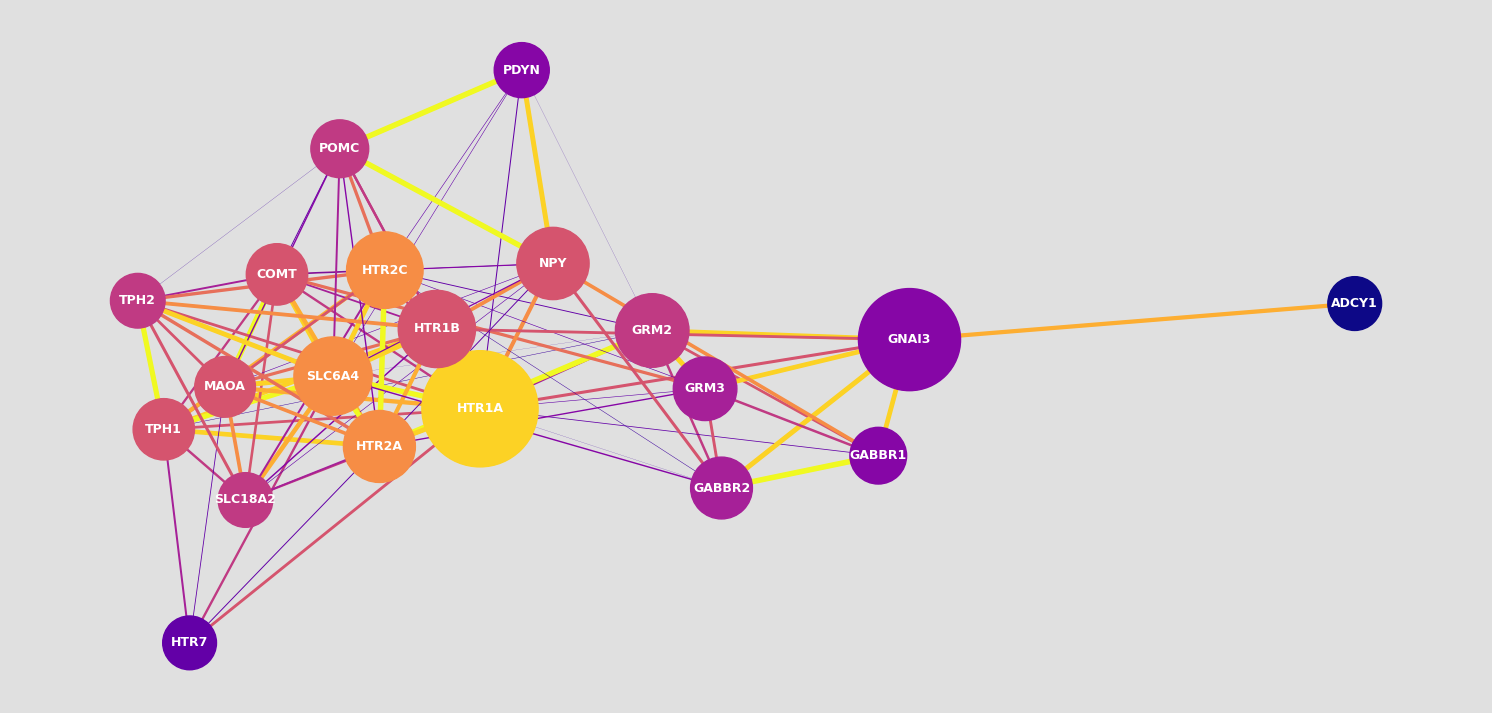

In [11]:
pos = nx.spring_layout(G)
plt.figure(figsize=(19,9),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='white',font_weight='bold',font_size='9')
plt.axis('off')
plt.show()

Bu grafikte çok daha fazla bilgi gösterilmektedir. Renk aralığı koyu mordan parlak sarıya kadar gider. Düğüm ne kadar sarıysa derecesi o kadar yüksektir. Düğüm ne kadar büyükse, arasındalık merkeziliği o kadar büyüktür. Kenar ne kadar sarı ve genişse, etkileşim puanı da o kadar yüksektir.

Son bir faydalı görselleştirme, mümkün olan en düşük ağırlığa sahip tüm düğümleri birbirine bağlayan kenarların alt kümesi olan minimum yayılan ağaçtır:

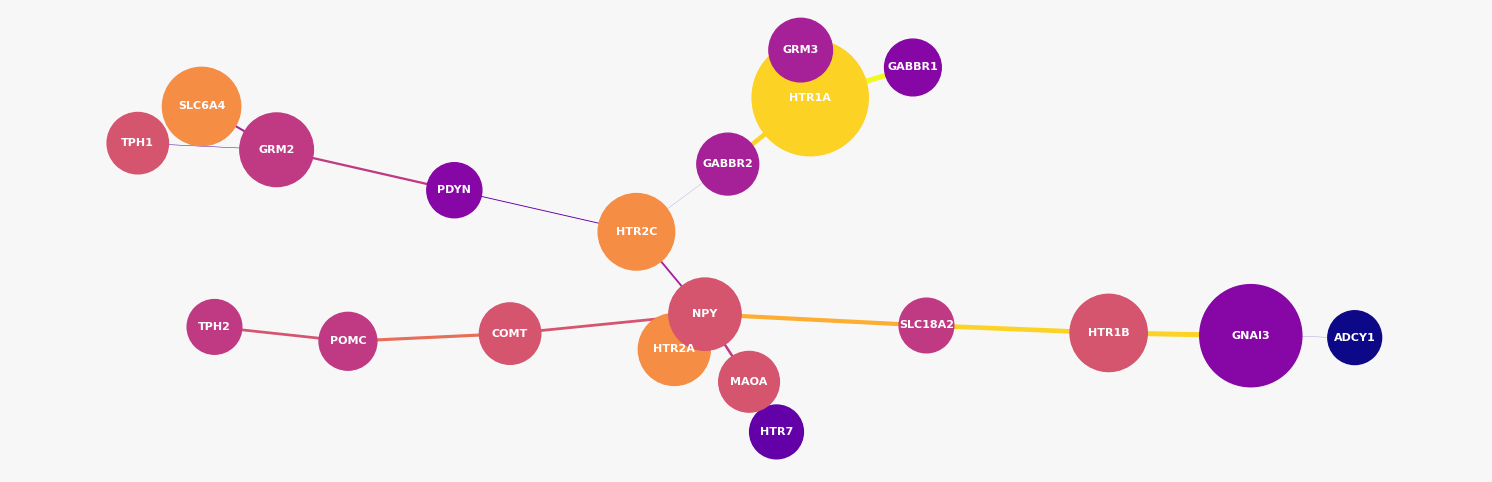

In [12]:
T = nx.minimum_spanning_tree(G)
pos = nx.spring_layout(T)
plt.figure(figsize=(19,6),facecolor=[0.7,0.7,0.7,0.1])
nx.draw_networkx(T, pos=pos, with_labels=True,node_color=c,node_size=s,edge_color= ec,width=ew,
                font_color='white',font_weight='bold',font_size='8')
plt.axis('off')
plt.show()

https://towardsdatascience.com/visualizing-protein-networks-in-python-58a9b51be9d5

https://string-db.org/cgi/input?sessionId=bKRiLVMYdKIi&input_page_show_search=on